In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importting the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import plotly.express as px
%matplotlib inline

# set a permanent global variable for the length and width of any chart i will be plotting that has to do with the (figure.figsize)
plt.rcParams["figure.figsize"] = (8,4)

In [3]:
Path = "/content/drive/MyDrive/Colab Notebooks/garment.zip"

In [4]:
df = zipfile.ZipFile(Path)   # unarchiving the dataset

# We use the code below to check the value in an archived file
df.namelist()              # This code checks the name of the file in the archived data

['garments_worker_productivity.csv']

In [5]:
# Reading the data set using pandas
df = pd.read_csv(df.open("garments_worker_productivity.csv"))

In [6]:
# Checking the top 6 of the data set
df.head(6)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125


In [7]:
# checking the rows and columns of thte dataset
df.shape

(1197, 15)

**DATA PREPROCESSING**

In [8]:
# info about the data, this can also show us wheter there are nan values and how many they are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [9]:
#Checking for null values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [10]:
# This code gives us the column in the datset
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [11]:

#Changing the date to real date_time object
df.date = pd.to_datetime(df.date)

In [12]:
# Renaming some columns to a readable column
df = df.rename(columns = { "wip" :"work_in_progress",
        "smv":  "standard_minute_value" })

In [13]:
# handled the missing data by filling the missing  values with median
df.work_in_progress = df.work_in_progress.fillna(df.work_in_progress.median())

We are still in Data Precessing , so we will be checking some columns to see if there are issues and we will rectify them


In [14]:
df.department.unique()    # we see an issue with this and we are rectifying below

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [15]:
df.department = df.department.replace(to_replace = "finishing " , value = "finishing")
df.department = df.department.replace(to_replace = "sweing" , value = "sewing")  # There was a aspelling error so we fixed it

In [16]:
df.department.unique()   # confirmed if the code fixed the problem ----- This is optional

array(['sewing', 'finishing'], dtype=object)

In [17]:
# This gives us te statistical summary of our dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
standard_minute_value,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
work_in_progress,1197.0,1126.437761,1397.653191,7.000000,970.000000,1039.000000,1083.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [18]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'standard_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [19]:
df.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [20]:
df.date.value_counts()

2015-03-11    24
2015-01-31    24
2015-01-11    23
2015-03-10    23
2015-01-12    23
2015-01-24    23
2015-01-08    22
2015-01-10    22
2015-01-07    22
2015-01-13    22
2015-01-05    22
2015-03-09    22
2015-03-08    22
2015-03-03    22
2015-01-22    22
2015-02-25    21
2015-02-26    21
2015-02-28    21
2015-01-03    21
2015-01-04    21
2015-01-28    21
2015-01-27    21
2015-03-04    21
2015-01-25    21
2015-01-17    21
2015-01-14    21
2015-01-06    21
2015-02-18    21
2015-01-29    20
2015-02-17    20
2015-03-02    20
2015-03-01    20
2015-02-22    20
2015-02-19    20
2015-03-05    19
2015-03-07    19
2015-02-24    19
2015-02-23    19
2015-01-01    19
2015-02-03    19
2015-02-15    19
2015-01-15    19
2015-01-18    19
2015-01-19    19
2015-01-21    19
2015-01-26    19
2015-02-01    19
2015-02-02    19
2015-02-04    19
2015-02-07    19
2015-02-08    19
2015-02-10    19
2015-02-11    19
2015-02-12    19
2015-02-05    18
2015-02-09    18
2015-02-16    18
2015-02-14    17
2015-01-20    

In [21]:
df.day.value_counts()    # take weekend as 0 and weekday as 1

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [22]:
df.day = df.day.replace({"Wednesday" : 1,"Tuesday": 1,"Thursday": 1,"Monday": 1
                         , "Sunday" : 0, "Saturday" : 0})

In [23]:
df.day.unique()

array([1, 0])

In [24]:
df.dtypes

date                     datetime64[ns]
quarter                          object
department                       object
day                               int64
team                              int64
targeted_productivity           float64
standard_minute_value           float64
work_in_progress                float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object


**EDA**

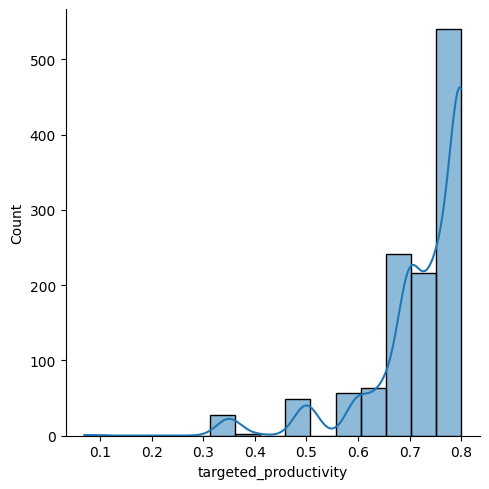

In [25]:
sb.displot(data = df, x= "targeted_productivity" , bins = 15 , kde = True);

<Axes: ylabel='targeted_productivity'>

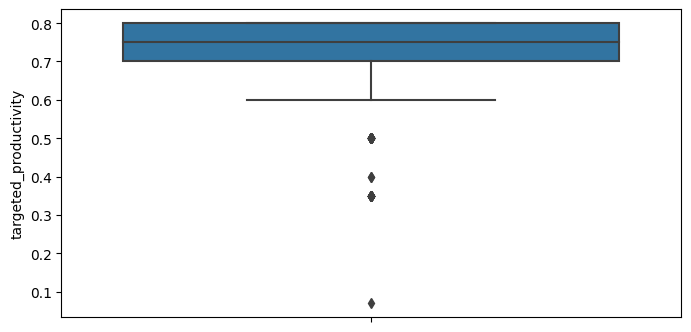

In [26]:
sb.boxplot(data = df , y = "targeted_productivity")

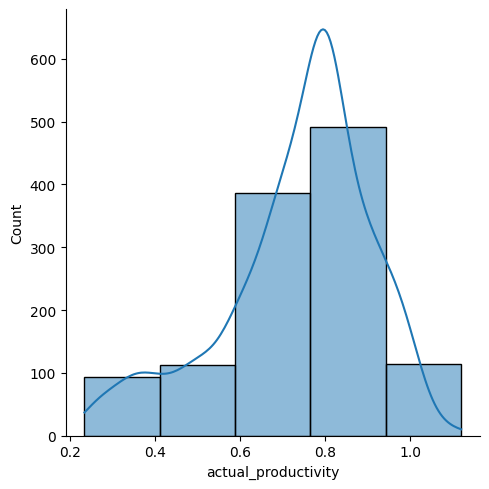

In [27]:
sb.displot(data = df , x = "actual_productivity", bins = 5, kde = True)

In [28]:
fig = px.box(df, y = "actual_productivity" , x = "department")
fig.show()
# So we see the the precise value of the outlier in the actual_productivity column

In [29]:
df_1 = df[df["actual_productivity"] > 0.49]

We did not remove the whole outlier due to the less number of our dataset
-- we had originally 1197 total dataset and if we remove the total outlier , it will affect our machine learning model when training

In [30]:
fig = px.box(df_1, y = "actual_productivity" , x = "department")
fig.show()

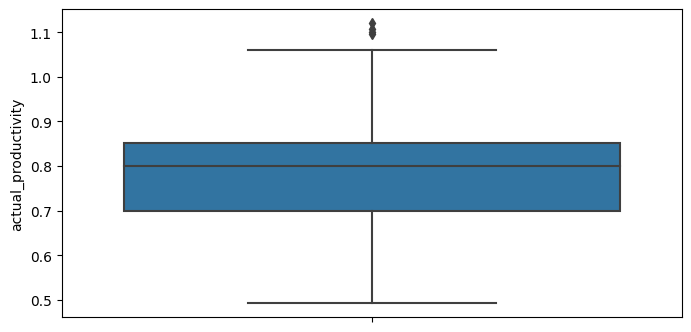

In [31]:
sb.boxplot(y = "actual_productivity" , data = df_1);


In [32]:
df_1.shape

(1071, 15)

In [33]:
df.shape

(1197, 15)

In [34]:
1197 - 1071   # This is optional . we just checked the impact of the removing the outlier from our data

126

In [35]:
impact = (df.shape[0]- df_1.shape[0]) /df_1.shape[0]* 100
print(round(impact ,2),"%")     # this had a very good impact to affect our ML training

11.76 %


In [36]:
Quarter = pd.get_dummies(df_1.quarter , drop_first=True)
Department = pd.get_dummies(df_1.department, drop_first = True)


In [37]:
new_df = pd.concat([Quarter , Department ,df_1] , axis = 1 )

In [38]:
new_df.columns

Index(['Quarter2', 'Quarter3', 'Quarter4', 'Quarter5', 'sewing', 'date',
       'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'standard_minute_value', 'work_in_progress', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [39]:
new_df.shape[1]

20

In [40]:
new_df.drop(["quarter" , "department"] , axis = 1 , inplace = True)

In [41]:
new_df.columns # we can see we dont have those columns we dropped again the the dataset

Index(['Quarter2', 'Quarter3', 'Quarter4', 'Quarter5', 'sewing', 'date', 'day',
       'team', 'targeted_productivity', 'standard_minute_value',
       'work_in_progress', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

**Training the Dataset**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy

In [43]:
X = new_df.drop(["actual_productivity" , "date"] , axis = 1)
y = new_df.actual_productivity

In [44]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [45]:
len(X_train)

856

In [46]:
len(X_test)

215

# LINEAR REGRESSION

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train , y_train)

LinearRegression()

In [49]:
prediction = lr.predict(X_test)

In [50]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,prediction))
print('Mean squared Error:',metrics.mean_squared_error(y_test,prediction))
print('Root mean square Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error: 0.0834622058605684
Mean squared Error: 0.012792280632867704
Root mean square Error: 0.11310296473951381


In [51]:
X_4train, X_4test,y_4train,y_4test = train_test_split(X,y,test_size = 0.2)

In [52]:
len(X_4train)

856

# Decision Tree

In [53]:
dtreemodel = DecisionTreeRegressor()

In [54]:
dtreemodel.fit(X_4train , y_4train)

DecisionTreeRegressor()

In [55]:
prediction = dtreemodel.predict(X_4test)

In [56]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_4test,prediction))
print('Mean squared Error:',metrics.mean_squared_error(y_4test,prediction))
print('Root mean square Error:',np.sqrt(metrics.mean_squared_error(y_4test,prediction)))

Mean Absolute Error: 0.06792130195581396
Mean squared Error: 0.014194842690815508
Root mean square Error: 0.11914211132431517


**Random Forest**

In [62]:
X_5train , X_5test,y_5train ,y_5test = train_test_split(X,y ,test_size = 0.2)

In [63]:
rfmodel = RandomForestRegressor()

In [64]:
rfmodel.fit(X_5train , y_5train)

RandomForestRegressor()

In [65]:
prediction = rfmodel.predict(X_5test)

In [66]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_5test,prediction))
print('Mean squared Error:',metrics.mean_squared_error(y_5test,prediction))
print('Root mean square Error:',np.sqrt(metrics.mean_squared_error(y_5test,prediction)))

Mean Absolute Error: 0.05104166959552154
Mean squared Error: 0.007455848487711442
Root mean square Error: 0.08634725524133029
